In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#pd.options.mode.chained_assignment = None

df = pd.read_csv('/Users/zhicong/Desktop/Movie Correlations Project/movies_database.csv')
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [2]:
#checking for the percentage of missing values

for columns in df.columns:
    pct_missing = np.mean(df[columns].isnull())
    print('{} - {}%'.format(columns, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [3]:
df.dropna(inplace=True)

In [4]:
for columns in df.columns:
    pct_missing = np.mean(df[columns].isnull())
    print('{} - {}%'.format(columns, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [5]:
# Checking memory usage 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [6]:
#reducing the memory usage 

df['rating'].nunique()
df['rating'] = df['rating'].astype('category')

In [7]:
df['genre'].nunique()
df['genre'] = df['genre'].astype('category')

In [8]:
# Checking memory usage 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      5421 non-null   object  
 1   rating    5421 non-null   category
 2   genre     5421 non-null   category
 3   year      5421 non-null   int64   
 4   released  5421 non-null   object  
 5   score     5421 non-null   float64 
 6   votes     5421 non-null   float64 
 7   director  5421 non-null   object  
 8   writer    5421 non-null   object  
 9   star      5421 non-null   object  
 10  country   5421 non-null   object  
 11  budget    5421 non-null   float64 
 12  gross     5421 non-null   float64 
 13  company   5421 non-null   object  
 14  runtime   5421 non-null   float64 
dtypes: category(2), float64(5), int64(1), object(7)
memory usage: 604.5+ KB


In [9]:
# check for duplicates

# print(df.duplicated())
print(df[df.duplicated()])

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


In [10]:
# Sorting the data by gross earnings 

df_sorted = df.sort_values('gross', inplace=True, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [11]:
df[['name', 'budget', 'gross']].head()

,name,budget,gross
5445,Avatar,237000000.0,2.847246e+09
7445,Avengers: Endgame,356000000.0,2.797501e+09
3045,Titanic,200000000.0,2.201647e+09
6663,Star Wars: Episode VII - The Force Awakens,245000000.0,2.069522e+09
7244,Avengers: Infinity War,321000000.0,2.048360e+09


<AxesSubplot:xlabel='gross'>

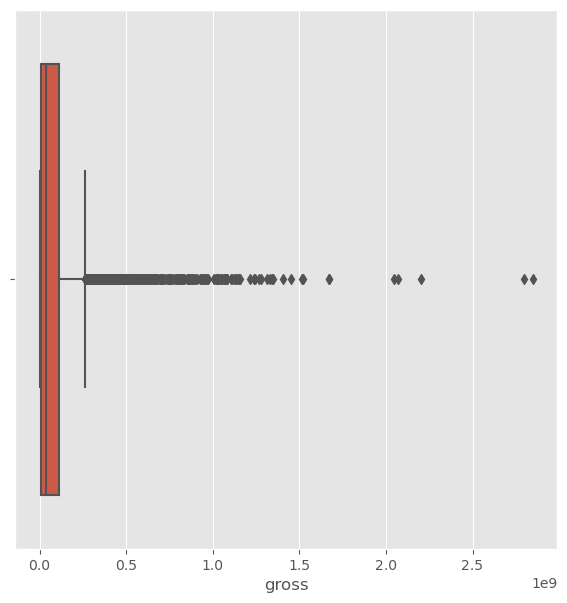

In [12]:
# Checking for outliners

plt.figure(figsize=(7,7))
sns.boxplot(x=df["gross"])

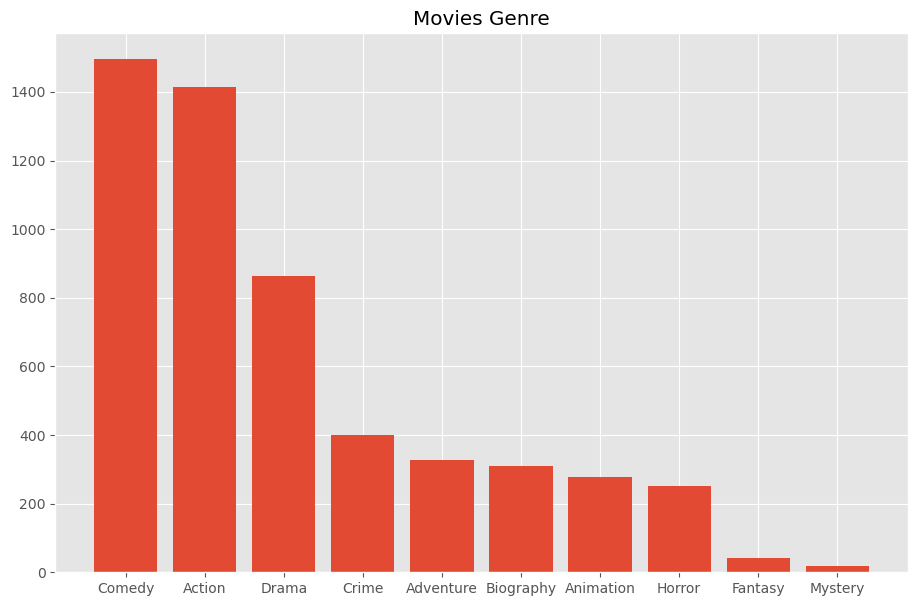

In [13]:
# Pie chart of movie genre
movie_genre = df['genre'].value_counts().head(10)
plt.figure(figsize=(11,7))
plt.bar(movie_genre.index.values, movie_genre)
plt.title("Movies Genre")
plt.show()


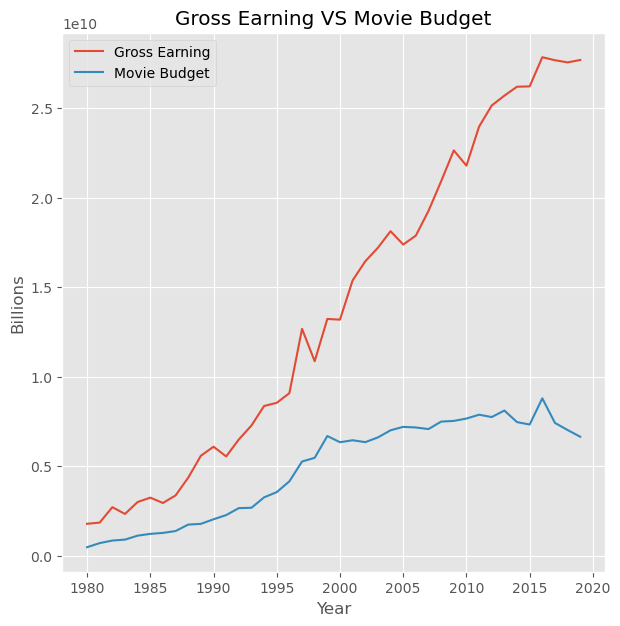

In [14]:
# Gross revenue over the years using line chart 
gross = df.groupby("year")["gross"].sum()
gross = gross.loc[gross.index != 2020]

budget = df.groupby("year")["budget"].sum()
budget = budget.loc[budget.index != 2020]


# Line plot
plt.figure(figsize=(7,7))
plt.plot(gross.index, gross, label = "Gross Earning")
plt.plot(budget.index, budget, label = "Movie Budget")
plt.xlabel('Year')
plt.ylabel('Billions')
plt.legend()
plt.title('Gross Earning VS Movie Budget')
plt.show()

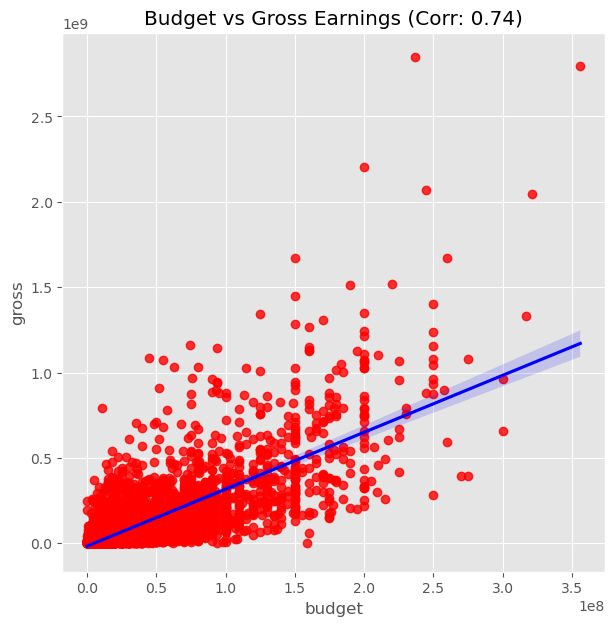

In [15]:
# Comparing budget and gross earnings
plt.figure(figsize=(7,7))
sns.regplot(x='budget', y='gross', data=df, 
            scatter_kws={"color":"red"}, line_kws={"color":"blue"})

# Calculating Pearson correlation coefficient
corr, _ = pearsonr(df['budget'], df['gross'])
corr = round(corr, 2)

plt.title('Budget vs Gross Earnings (Corr: ' + str(corr) + ')')
plt.show()

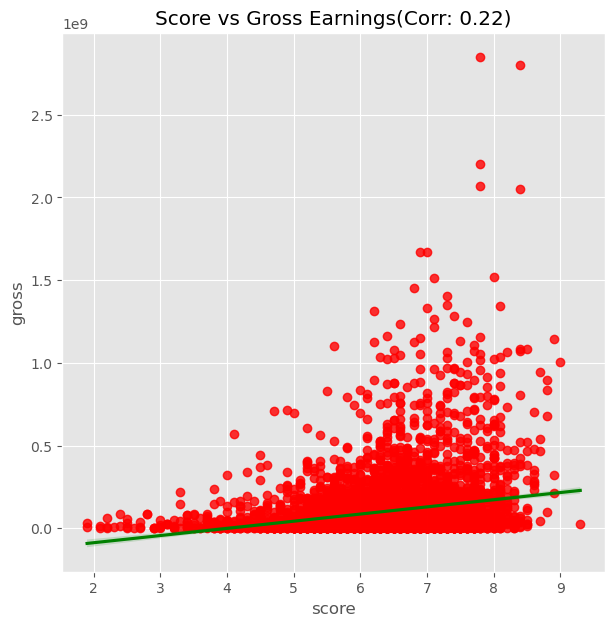

In [16]:
#Comparing gross earnings and score
plt.figure(figsize=(7,7))
sns.regplot(x="score", y="gross", data=df,
            scatter_kws={"color":"red"}, line_kws={"color":"green"})

corr, _ = pearsonr(df['score'], df['gross'])
corr = round(corr, 2)

plt.title('Score vs Gross Earnings(Corr: ' + str(corr) + ')')
plt.show()

In [17]:
# set the float format option to display only two decimal places
pd.options.display.float_format = '{:.2f}'.format

In [18]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.00,0.06,0.21,0.33,0.27,0.08
score,0.06,1.00,0.47,0.07,0.22,0.41
votes,0.21,0.47,1.00,0.44,0.61,0.35
budget,0.33,0.07,0.44,1.00,0.74,0.32
gross,0.27,0.22,0.61,0.74,1.00,0.28
runtime,0.08,0.41,0.35,0.32,0.28,1.00


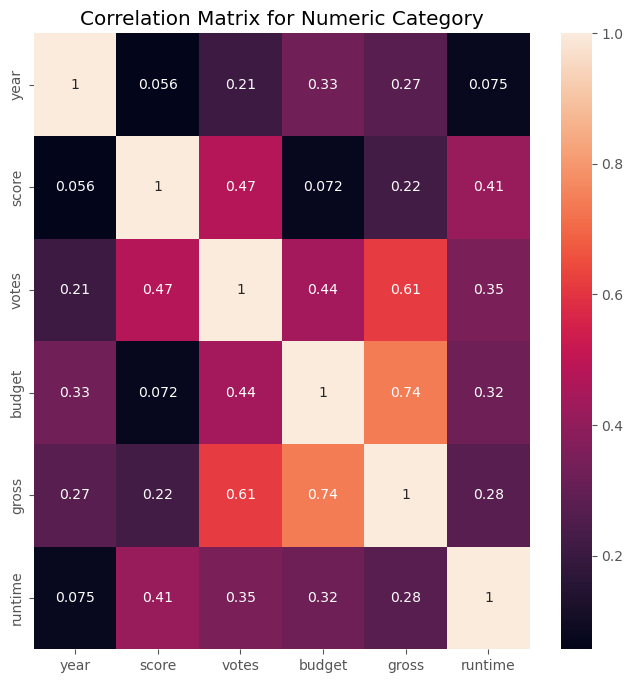

In [19]:
correlation_matrix = df.corr(method='pearson')
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Category')

plt.show()

In [20]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.90,222000.00,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.00,1670727580.00,Walt Disney Pictures,118.00
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.00,593000.00,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.00,1670516444.00,Universal Pictures,124.00
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.00,1300000.00,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.00,1518815515.00,Marvel Studios,143.00
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.10,370000.00,James Wan,Chris Morgan,Vin Diesel,United States,190000000.00,1515341399.00,Universal Pictures,137.00
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.80,148000.00,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.00,1450026933.00,Walt Disney Animation Studios,103.00


In [21]:
# Using factorize to assign a random number for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.00,0.31,0.19,0.27,0.67,0.14,0.61,0.68,0.76,0.60,0.12,0.53,0.99,0.63,0.09
rating,0.31,1.00,0.03,0.10,0.24,-0.08,0.12,0.23,0.25,0.23,0.11,0.28,0.32,0.27,0.03
genre,0.19,0.03,1.00,0.08,0.12,0.05,0.18,0.13,0.13,0.14,-0.06,0.18,0.19,0.08,0.01
year,0.27,0.10,0.08,1.00,0.36,0.05,0.29,0.19,0.23,0.24,-0.05,0.19,0.28,0.14,0.04
released,0.67,0.24,0.12,0.36,1.00,0.10,0.48,0.48,0.54,0.44,0.10,0.40,0.68,0.41,0.06
score,0.14,-0.08,0.05,0.05,0.10,1.00,0.25,0.18,0.12,0.14,-0.06,-0.01,0.14,0.02,0.06
votes,0.61,0.12,0.18,0.29,0.48,0.25,1.00,0.47,0.52,0.43,0.01,0.32,0.62,0.35,0.09
director,0.68,0.23,0.13,0.19,0.48,0.18,0.47,1.00,0.64,0.50,0.12,0.44,0.69,0.53,0.08
writer,0.76,0.25,0.13,0.23,0.54,0.12,0.52,0.64,1.00,0.51,0.14,0.45,0.78,0.53,0.07
star,0.60,0.23,0.14,0.24,0.44,0.14,0.43,0.50,0.51,1.00,0.11,0.46,0.61,0.46,0.10


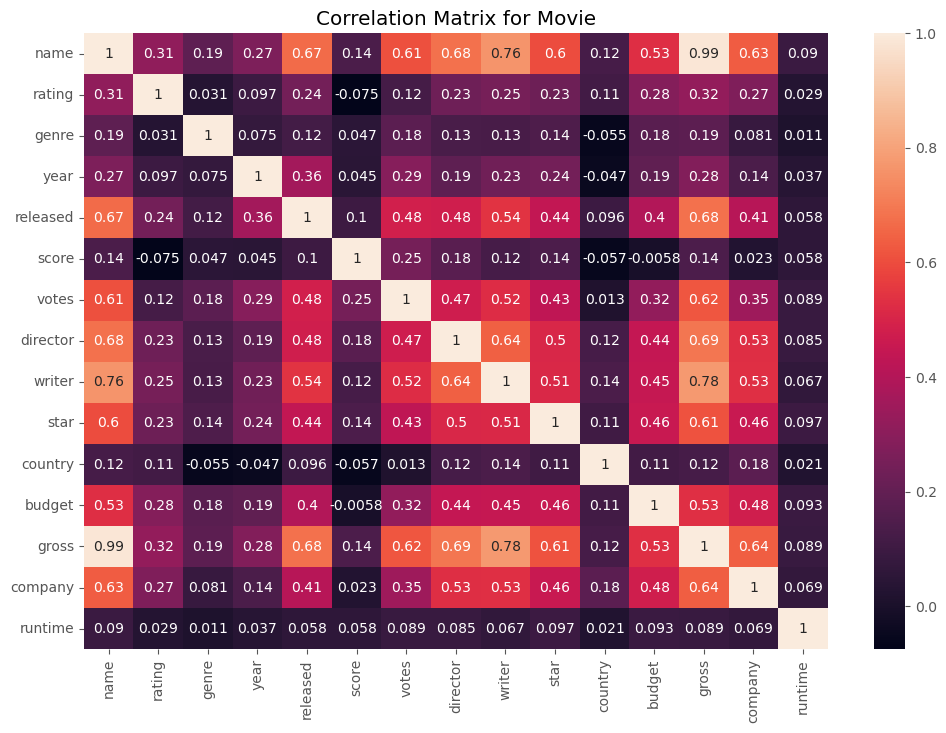

In [22]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Movie')

plt.show()

In [23]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

corr_pairs = correlation_mat.unstack()
corr_pairs = corr_pairs[corr_pairs > 0.5]
corr_pairs = corr_pairs.sort_values(ascending=False)
print(corr_pairs)


name      name       1.00
released  released   1.00
company   company    1.00
gross     gross      1.00
budget    budget     1.00
country   country    1.00
star      star       1.00
writer    writer     1.00
director  director   1.00
votes     votes      1.00
score     score      1.00
runtime   runtime    1.00
genre     genre      1.00
rating    rating     1.00
year      year       1.00
gross     name       0.99
name      gross      0.99
gross     writer     0.78
writer    gross      0.78
name      writer     0.76
writer    name       0.76
gross     director   0.69
director  gross      0.69
name      director   0.68
director  name       0.68
gross     released   0.68
released  gross      0.68
name      released   0.67
released  name       0.67
writer    director   0.64
director  writer     0.64
company   gross      0.64
gross     company    0.64
company   name       0.63
name      company    0.63
votes     gross      0.62
gross     votes      0.62
          star       0.61
star      gr

In [24]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

corr_pairs = correlation_mat.unstack()
corr_pairs = corr_pairs[corr_pairs > 0.5]
corr_pairs = corr_pairs[corr_pairs > 0.5].sort_values(ascending=False)
print(corr_pairs[15:])

gross     name       0.99
name      gross      0.99
gross     writer     0.78
writer    gross      0.78
name      writer     0.76
writer    name       0.76
gross     director   0.69
director  gross      0.69
name      director   0.68
director  name       0.68
gross     released   0.68
released  gross      0.68
name      released   0.67
released  name       0.67
writer    director   0.64
director  writer     0.64
company   gross      0.64
gross     company    0.64
company   name       0.63
name      company    0.63
votes     gross      0.62
gross     votes      0.62
          star       0.61
star      gross      0.61
votes     name       0.61
name      votes      0.61
star      name       0.60
name      star       0.60
writer    released   0.54
released  writer     0.54
gross     budget     0.53
budget    gross      0.53
company   writer     0.53
writer    company    0.53
company   director   0.53
director  company    0.53
budget    name       0.53
name      budget     0.53
votes     wr